<a href="https://colab.research.google.com/github/abhilash1601/Computer_vision_Nija_cart/blob/main/ninja_cart_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction

Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

The Data set consiste of following types -

1. Tomato
2. Potato
3. Onion
4. Indian market

Unziping the compressed file

In [ ]:
!unzip /content/drive/MyDrive/ninjacart_data.zip

Archive:  /content/drive/MyDrive/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/

**Structure of the directory**

In [ ]:
import os

def print_directory_structure_with_file_count(root_dir, indent=""):
    items = os.listdir(root_dir)
    for item in items:
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            num_files = len([name for name in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, name))])
            print(f"{indent}Directory: {item} (Files: {num_files})")
            print_directory_structure_with_file_count(item_path, indent + "  ")


folder_path = '/content/ninjacart_data'
print_directory_structure_with_file_count(folder_path)

Directory: test (Files: 0)
  Directory: onion (Files: 83)
  Directory: indian market (Files: 81)
  Directory: potato (Files: 81)
  Directory: tomato (Files: 106)
Directory: train (Files: 0)
  Directory: onion (Files: 849)
  Directory: indian market (Files: 599)
  Directory: potato (Files: 898)
  Directory: tomato (Files: 789)


**Creating a Validation data set from train data set**

In [ ]:
import shutil

train_data_dir = '/content/ninjacart_data/train'
validation_data_dir = '/content/ninjacart_data/validation'


if not os.path.exists(validation_data_dir):
    os.makedirs(validation_data_dir)


class_names = os.listdir(train_data_dir)


split_ratio = 0.2
for class_name in class_names:
    class_dir = os.path.join(train_data_dir, class_name)
    files = os.listdir(class_dir)
    num_validation = int(split_ratio * len(files))
    validation_files = files[:num_validation]

    # Create class directory within validation directory
    validation_class_dir = os.path.join(validation_data_dir, class_name)
    os.makedirs(validation_class_dir, exist_ok=True)

    # Move validation files to the validation class directory
    for file in validation_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(validation_class_dir, file)
        shutil.move(src, dst)

print("Validation directory created successfully.")

Validation directory created successfully.


**Structure of the directory after validation split**

In [ ]:
import os

def print_directory_structure_with_file_count(root_dir, indent=""):
    items = os.listdir(root_dir)
    for item in items:
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            num_files = len([name for name in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, name))])
            print(f"{indent}Directory: {item} (Files: {num_files})")
            print_directory_structure_with_file_count(item_path, indent + "  ")


folder_path = '/content/ninjacart_data'
print_directory_structure_with_file_count(folder_path)

Directory: test (Files: 0)
  Directory: onion (Files: 83)
  Directory: indian market (Files: 81)
  Directory: potato (Files: 81)
  Directory: tomato (Files: 106)
Directory: train (Files: 0)
  Directory: onion (Files: 680)
  Directory: indian market (Files: 480)
  Directory: potato (Files: 719)
  Directory: tomato (Files: 632)
Directory: validation (Files: 0)
  Directory: onion (Files: 169)
  Directory: indian market (Files: 119)
  Directory: potato (Files: 179)
  Directory: tomato (Files: 157)


**Display  the random image from the data sets , and storing the meta data like size , diminssion , pixels**

In [ ]:
import os
from collections import defaultdict
from PIL import Image

data_dir = '/content/ninjacart_data'
class_names = os.listdir("/content/ninjacart_data/train")
subsets = ['train', 'test']

image_sizes = defaultdict(lambda: defaultdict(list))


for subset in subsets:
    subset_dir = os.path.join(data_dir, subset)


    # Iterate through each class
    for class_name in class_names:
        class_dir = os.path.join(subset_dir, class_name)


        # Iterate through images in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image_size = os.path.getsize(image_path)
            img = Image.open(image_path)
            width, height = img.size
            channels = len(img.getbands())
            resolution = img.info.get("dpi")
            dict1={"Image_size":image_size,"Image_dim":(width,height,channels),"Image_no_of_pix":width*height}  # Get the image size in bytes
            image_sizes[class_name][subset].append(dict1)




In [ ]:
image_sizes['indian market']['train'][1]

{'Image_size': 12235, 'Image_dim': (289, 175, 3), 'Image_no_of_pix': 50575}

In [ ]:
import os
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(111)
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import seaborn as sns


**Pixel dristribution , to check the range of the image size**

Plot of distribution of image pixels in class potato train set


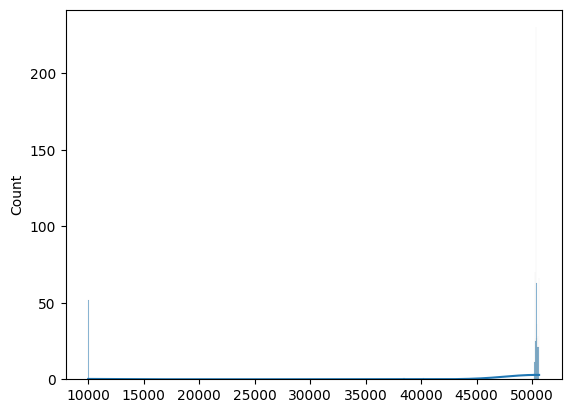

Plot of distribution of image pixels in class onion train set


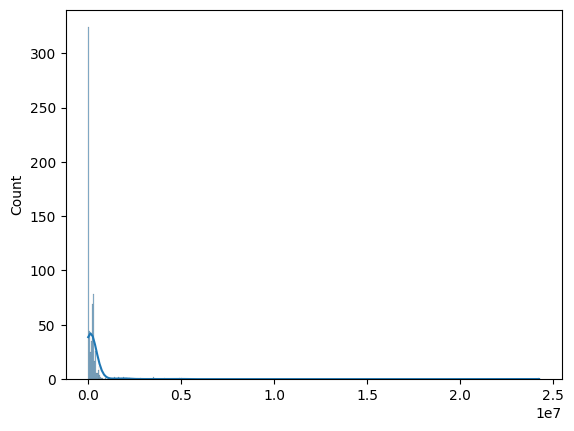

Plot of distribution of image pixels in class indian market train set


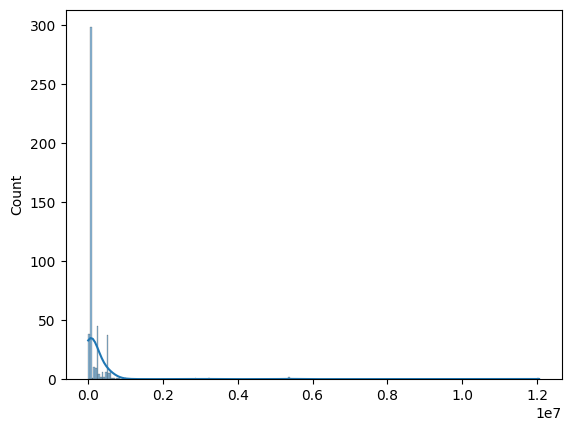

Plot of distribution of image pixels in class tomato train set


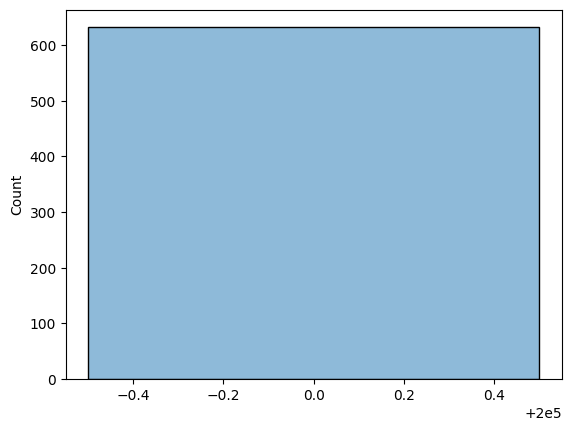

In [ ]:



for i in image_sizes.keys():
  for j in image_sizes[i].keys():
    if(j=="train"):
      li=[]
      for k in range(len(image_sizes[i][j])):

        li.append(image_sizes[i][j][k]['Image_no_of_pix'])

      print("Plot of distribution of image pixels in class",i,j,"set")
      sns.histplot(li,kde=True)
      plt.show()




scatter Plot of  image height and width in class potato train set


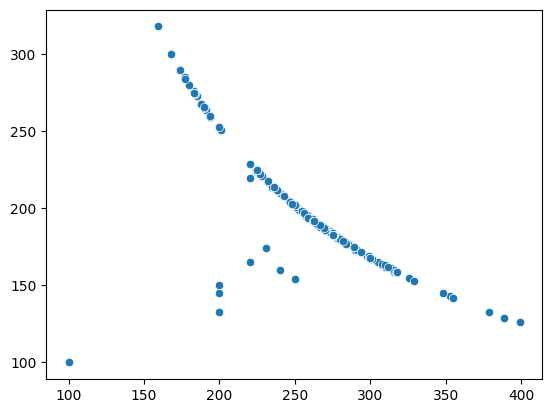

------------------------------------------------------------------------------
------------------------------------------------------------------------------
scatter Plot of  image height and width in class onion train set


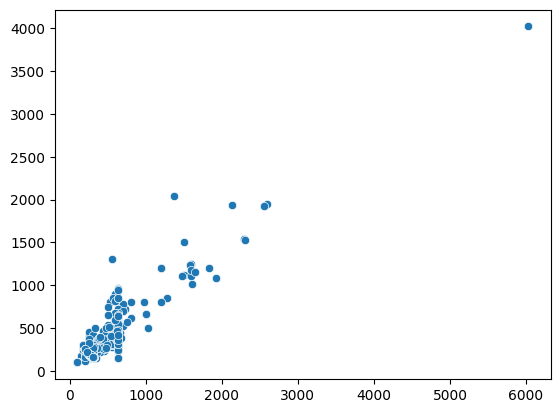

------------------------------------------------------------------------------
------------------------------------------------------------------------------
scatter Plot of  image height and width in class indian market train set


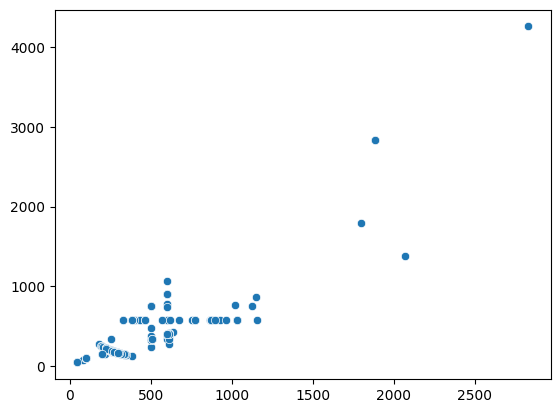

------------------------------------------------------------------------------
------------------------------------------------------------------------------
scatter Plot of  image height and width in class tomato train set


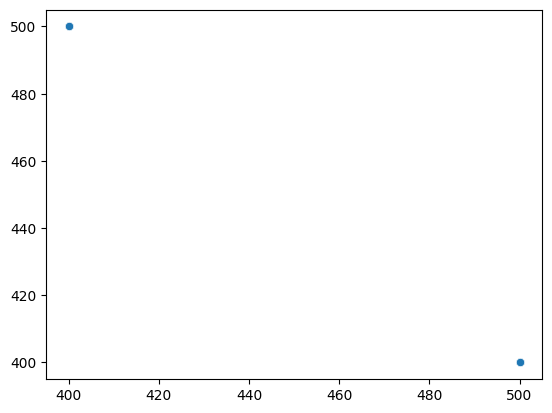

------------------------------------------------------------------------------
------------------------------------------------------------------------------


In [ ]:
for i in image_sizes.keys():
  for j in image_sizes[i].keys():
    if(j=='train'):
      li=[]
      mi=[]
      for k in range(len(image_sizes[i][j])):

        li.append(image_sizes[i][j][k]['Image_dim'][0])
        mi.append(image_sizes[i][j][k]['Image_dim'][1])

      print("scatter Plot of  image height and width in class",i,j,"set")
      sns.scatterplot(x=li,y=mi)
      plt.show()
    print("------------------------------------------------------------------------------")





In [ ]:
for i in image_sizes.keys():
  for j in image_sizes[i].keys():
    li=[]
    hi=[]
    wi=[]
    ch=[]
    for k in range(len(image_sizes[i][j])):

      li.append(image_sizes[i][j][k]['Image_no_of_pix'])
      hi.append(image_sizes[i][j][k]['Image_dim'][0])
      wi.append(image_sizes[i][j][k]['Image_dim'][1])
      ch.append(image_sizes[i][j][k]['Image_dim'][2])

    print("average No_of_Image_Pixel for class ",i,j,"set is",np.mean(li))
    print("average Image size or dim for class ",i,j,"set is",(np.round(np.mean(hi)),np.round(np.mean(wi)),np.round(np.mean(ch))))
    print("-----------------------------------------------------------------------------------------------------------------------")

    plt.show()


average No_of_Image_Pixel for class  potato train set is 47306.713490959664
average Image size or dim for class  potato train set is (250.0, 188.0, 3.0)
-----------------------------------------------------------------------------------------------------------------------
average No_of_Image_Pixel for class  potato test set is 42405.74074074074
average Image size or dim for class  potato test set is (234.0, 173.0, 3.0)
-----------------------------------------------------------------------------------------------------------------------
average No_of_Image_Pixel for class  onion train set is 265673.2617647059
average Image size or dim for class  onion train set is (464.0, 362.0, 3.0)
-----------------------------------------------------------------------------------------------------------------------
average No_of_Image_Pixel for class  onion test set is 344303.9638554217
average Image size or dim for class  onion test set is (587.0, 491.0, 3.0)
---------------------------------------

Observation :

*   In Class tomato all images are in same shape , hence the uniform dist above
*   Class Onion has high resolution Images



**Random images and hist plot from train data set**

Subset: potato
Image File: potato11062 (1).jpeg


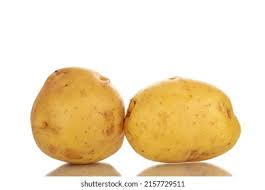

Image File: potato11348.jpeg


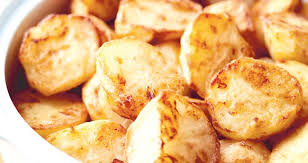

Subset: onion
Image File: onion11096.jpeg


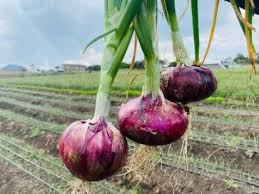

Image File: onion11021 (1).jpeg


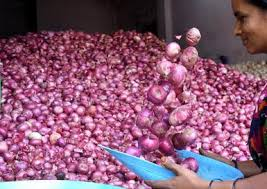

Subset: indian market
Image File: market11148.jpeg


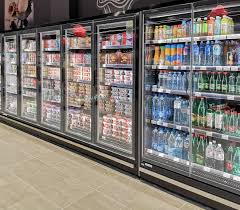

Image File: market11119.jpeg


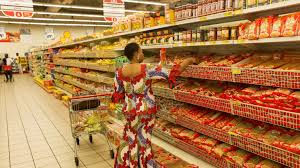

Subset: tomato
Image File: tomato733.png


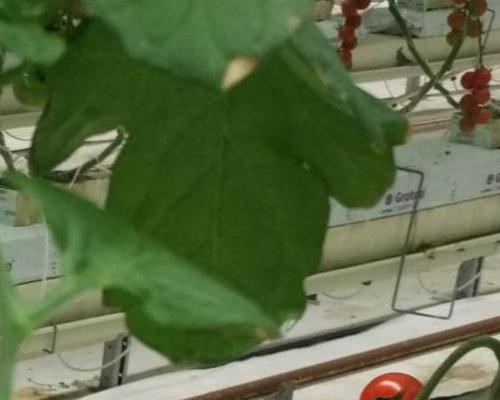

Image File: tomato360.png


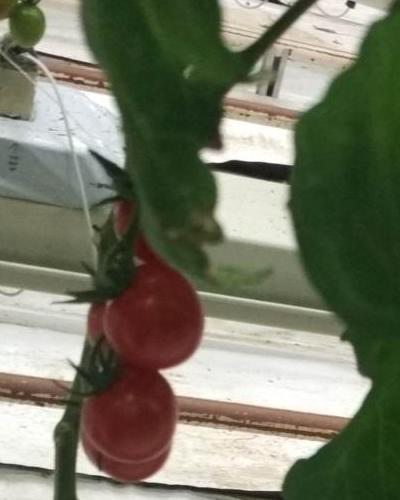

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display

# Specify the root path of your image directory
root_path = '/content/ninjacart_data'

num_images_to_display = 2

for class_name in os.listdir(root_path):
    class_dir = os.path.join(root_path, class_name)

    if not os.path.isdir(class_dir):
        continue


    if(class_name=="train"):


      for subset_name in os.listdir(class_dir):
          subset_dir = os.path.join(class_dir, subset_name)



        # Skip if subset_dir is not a directory
          if not os.path.isdir(subset_dir):
              continue

          print(f"Subset: {subset_name}")

        # List all image files in the subset directory
          image_files = [f for f in os.listdir(subset_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Randomly choose 'num_images_to_display' images from the subset
          random_images = random.sample(image_files, num_images_to_display)

        # Display the random images
          for i, image_filename in enumerate(random_images):
              image_path = os.path.join(subset_dir, image_filename)
              img = Image.open(image_path)


              print("Image File:", image_filename)
              display(img)
          print("===================================================================================================================================================")



Subset: potato


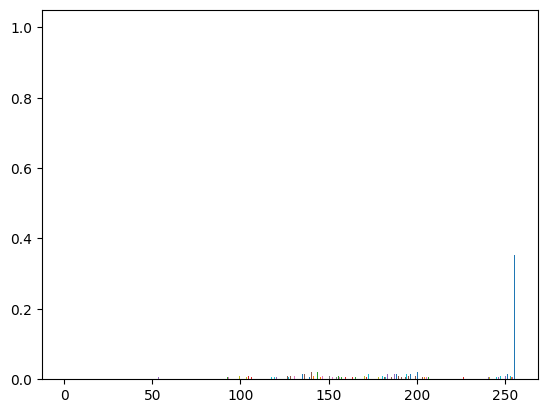

Image File: potato11254 (1).jpeg
Subset: onion


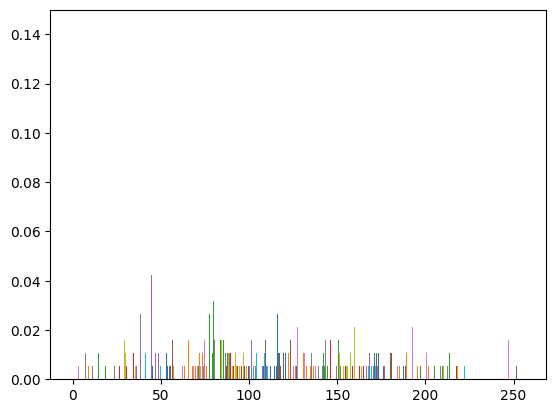

Image File: onion11021 (1).jpeg
Subset: indian market


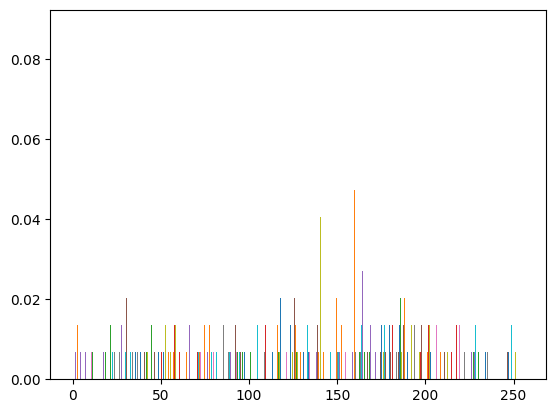

Image File: market11260.jpeg
Subset: tomato


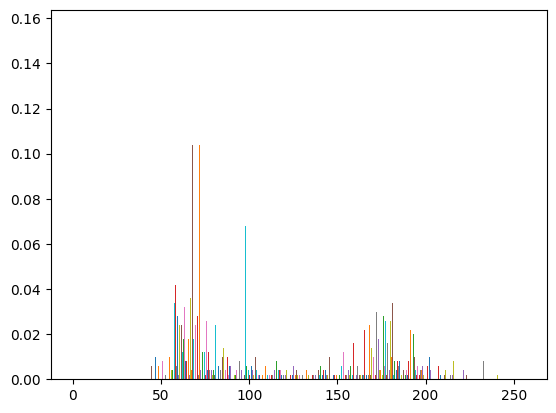

Image File: tomato643.png


In [ ]:
root_path = '/content/ninjacart_data'

num_images_to_display = 1

for class_name in os.listdir(root_path):
    class_dir = os.path.join(root_path, class_name)

    if not os.path.isdir(class_dir):
        continue


    if(class_name=='train'):

    # Iterate through 'train' and 'test' subsets
      for subset_name in os.listdir(class_dir):
          subset_dir = os.path.join(class_dir, subset_name)



          if not os.path.isdir(subset_dir):
            continue

          print(f"Subset: {subset_name}")

        # List all image files in the subset directory
          image_files = [f for f in os.listdir(subset_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Randomly choose 'num_images_to_display' images from the subset
          random_images = random.sample(image_files, num_images_to_display)

        # Display the random images
          for i, image_filename in enumerate(random_images):
              image_path = os.path.join(subset_dir, image_filename)
              img = Image.open(image_path)
              img_gray = img.convert("L")
              list_np=np.array(img_gray)
              plt.hist(list_np, bins=256, range=(0, 256), density=True)
              plt.show()


              print("Image File:", image_filename)
          print("===================================================================================================================================================")



**Loading the image into Image Generator and Data Augmentation**
like
rescale=1./255,  # Rescale pixel values to [0, 1]

rotation_range=20,  # Randomly rotate images by up to 20 degrees

width_shift_range=0.2,  # Randomly shift image width by up to 20% of its size

height_shift_range=0.2,  # Randomly shift image height by up to 20% of its size

shear_range=0.2,  # Shear intensity

zoom_range=0.2,  # Randomly zoom in by up to 20%

horizontal_flip=True,  # Randomly flip images horizontally

fill_mode='nearest'  # Fill in missing pixels with the nearest available


In [ ]:
train_dir = 'ninjacart_data/train'
valid_dir="ninjacart_data/validation"
test_dir = 'ninjacart_data/test'

In [ ]:
train_data_dir = 'ninjacart_data/train'
test_data_dir = 'ninjacart_data/test'
valid_data_dir="ninjacart_data/validation"

batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift image width by up to 20% of its size
    height_shift_range=0.2,  # Randomly shift image height by up to 20% of its size
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Randomly zoom in by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels with the nearest available
)
valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="rgb",
    shuffle = True,



)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False,
    color_mode="rgb"
)

valid_generator = test_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False,
    color_mode="rgb"
)

Found 2511 images belonging to 4 classes.
Found 351 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


***MODEL -1***

**Basic CNN model with data augmentation , maxpool , drop out , without any early stoping or Lr schedular ,regulizer**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_shape = (224, 224, 3)
num_classes = 4

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_steps_per_epoch = len(train_generator)
valid_steps_per_epoch = len(valid_generator)

history = model.fit(train_generator,steps_per_epoch=train_steps_per_epoch, epochs=10, validation_data=valid_generator,validation_steps=valid_steps_per_epoch)

Epoch 1/10
79/79 [==============================] - 55s 537ms/step - loss: 0.9809 - accuracy: 0.6073 - val_loss: 0.5671 - val_accuracy: 0.7756
Epoch 2/10
79/79 [==============================] - 51s 643ms/step - loss: 0.6125 - accuracy: 0.7658 - val_loss: 0.5385 - val_accuracy: 0.7772
Epoch 3/10
79/79 [==============================] - 48s 602ms/step - loss: 0.5446 - accuracy: 0.7905 - val_loss: 0.4774 - val_accuracy: 0.7933
Epoch 4/10
79/79 [==============================] - 51s 652ms/step - loss: 0.4609 - accuracy: 0.8248 - val_loss: 0.4215 - val_accuracy: 0.8205
Epoch 5/10
79/79 [==============================] - 41s 521ms/step - loss: 0.4222 - accuracy: 0.8431 - val_loss: 0.4585 - val_accuracy: 0.8205
Epoch 6/10
79/79 [==============================] - 42s 528ms/step - loss: 0.4394 - accuracy: 0.8331 - val_loss: 0.3507 - val_accuracy: 0.8429
Epoch 7/10
79/79 [==============================] - 41s 519ms/step - loss: 0.4093 - accuracy: 0.8427 - val_loss: 0.3452 - val_accuracy: 0.8285

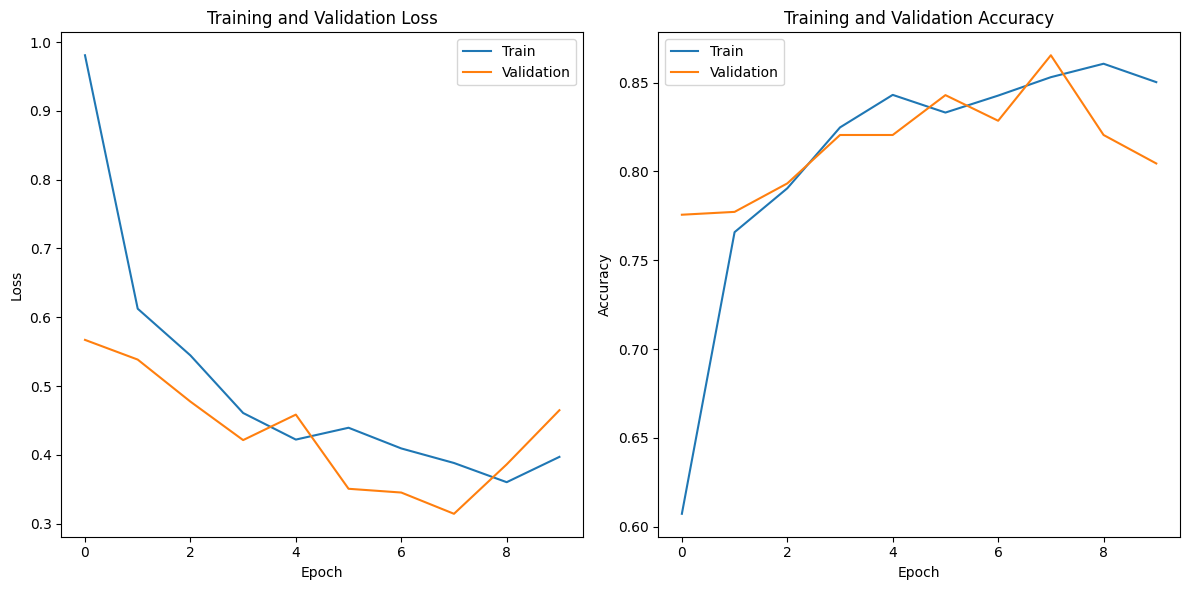

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


11/11 [==============================] - 3s 295ms/step


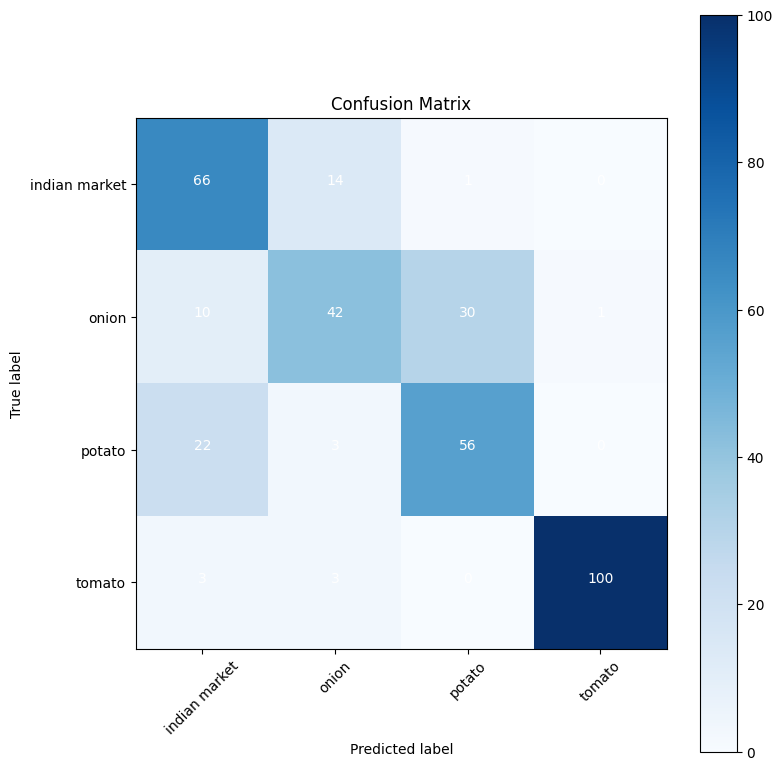

               precision    recall  f1-score   support

indian market       0.65      0.81      0.73        81
        onion       0.68      0.51      0.58        83
       potato       0.64      0.69      0.67        81
       tomato       0.99      0.94      0.97       106

     accuracy                           0.75       351
    macro avg       0.74      0.74      0.73       351
 weighted avg       0.76      0.75      0.75       351



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

confusion_mat = confusion_matrix(test_true_labels, test_pred_labels)

class_names = list(test_generator.class_indices.keys())


plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display counts in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


report = classification_report(test_true_labels, test_pred_labels, target_names=class_names)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.7521367521367521


**Model-1 (BaseLine Model)**

*   Test accuracy of 75% which good than a dumb model which predicts all classes equally and randomaly (0.25)

*   Good F1 score





**MODEL-2**

**Training same model above with early stopper , lr schedular , class weights etc**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_labels = np.unique(train_generator.classes)
class_labels

array([0, 1, 2, 3], dtype=int32)

In [ ]:
train_classes=train_generator.classes

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(class_labels),
                                        y = train_classes      )

In [ ]:

class_weights = dict(zip(np.unique(train_classes), class_weights))
class_weights

{0: 1.3078125,
 1: 0.9231617647058824,
 2: 0.8730876216968011,
 3: 0.9932753164556962}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

def create_cnn_model_11(input_shape, num_classes):
    model_1 = Sequential()

    # Convolutional layers
    model_1.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model_1.add(Activation('relu'))
    model_1.add(MaxPooling2D(pool_size=(2, 2)))
    model_1.add(BatchNormalization())

    model_1.add(Conv2D(128, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model_1.add(Activation('relu'))
    model_1.add(MaxPooling2D(pool_size=(2, 2)))
    model_1.add(BatchNormalization())

    model_1.add(Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model_1.add(Activation('relu'))
    model_1.add(MaxPooling2D(pool_size=(2, 2)))
    model_1.add(BatchNormalization())

    # Flatten the feature maps
    model_1.add(Flatten())

    # Fully connected layers
    model_1.add(Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model_1.add(Activation('relu'))
    model_1.add(Dropout(0.2))
    model_1.add(BatchNormalization())

    model_1.add(Dense(num_classes))
    model_1.add(Activation('softmax'))

    # Compile the model_1 with a lower learning rate and Adam optimizer
    optimizer = Adam(learning_rate=0.001)
    model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model_1

In [ ]:
input_shape = (224, 224, 3)
num_classes = 4

In [ ]:
model_11 = create_cnn_model_11(input_shape, num_classes)

In [ ]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 activation_6 (Activation)   (None, 109, 109, 128)    

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
early_stopper = EarlyStopping(min_delta=0.001, patience=10, verbose=1)

In [ ]:
history1 = model_11.fit(train_generator, epochs=30, validation_data=valid_generator,
                    callbacks=[checkpoint, lr_reducer, early_stopper],class_weight=class_weights)

Epoch 1/30
79/79 [==============================] - 50s 538ms/step - loss: 4.5320 - accuracy: 0.7443 - val_loss: 4.2267 - val_accuracy: 0.4103 - lr: 0.0010
Epoch 2/30
79/79 [==============================] - 43s 540ms/step - loss: 2.2714 - accuracy: 0.7889 - val_loss: 2.9151 - val_accuracy: 0.2516 - lr: 0.0010
Epoch 3/30
79/79 [==============================] - 43s 546ms/step - loss: 1.6233 - accuracy: 0.7865 - val_loss: 2.2543 - val_accuracy: 0.4295 - lr: 0.0010
Epoch 4/30
79/79 [==============================] - 43s 545ms/step - loss: 1.2963 - accuracy: 0.7945 - val_loss: 1.5617 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 5/30
79/79 [==============================] - 42s 532ms/step - loss: 1.1063 - accuracy: 0.8084 - val_loss: 1.2965 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/30
79/79 [==============================] - 42s 529ms/step - loss: 1.0152 - accuracy: 0.8140 - val_loss: 1.2960 - val_accuracy: 0.6474 - lr: 0.0010
Epoch 7/30
79/79 [==============================] - 42s 534ms/st

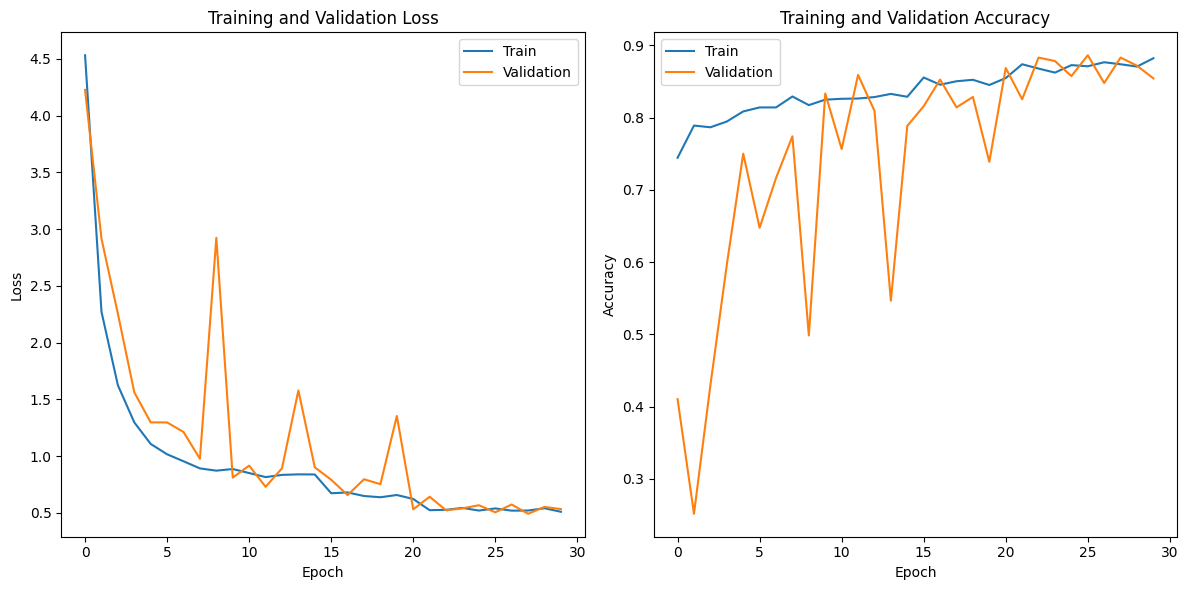

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


11/11 [==============================] - 5s 403ms/step


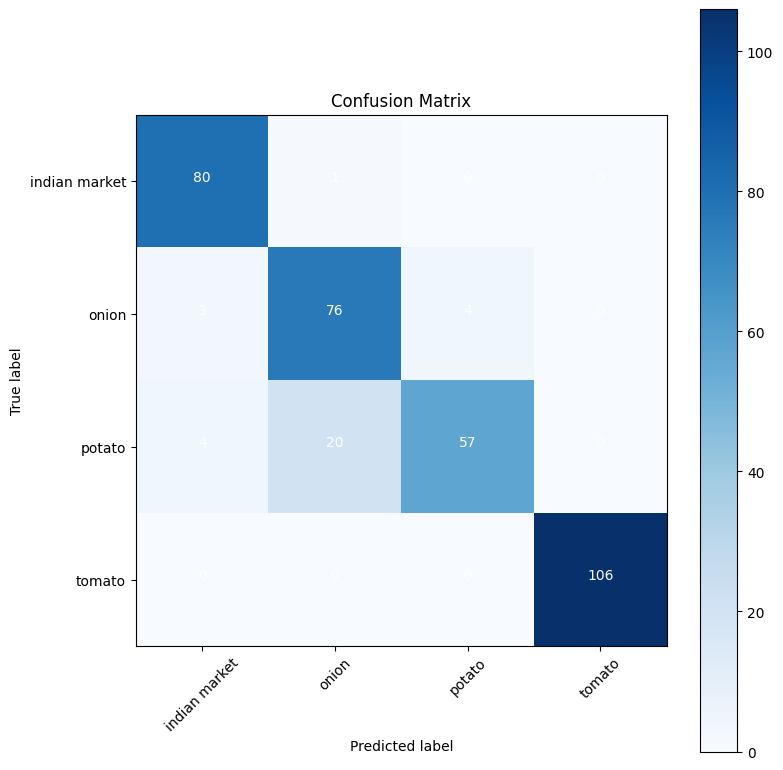

               precision    recall  f1-score   support

indian market       0.92      0.99      0.95        81
        onion       0.78      0.92      0.84        83
       potato       0.93      0.70      0.80        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.91       351
    macro avg       0.91      0.90      0.90       351
 weighted avg       0.92      0.91      0.91       351



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = model_11.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

confusion_mat = confusion_matrix(test_true_labels, test_pred_labels)

class_names = list(test_generator.class_indices.keys())


plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display counts in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


report = classification_report(test_true_labels, test_pred_labels, target_names=class_names)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9088319088319088


1/1 [==============================] - 0s 405ms/step


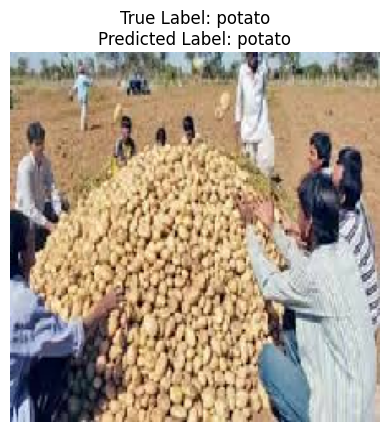

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 7

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model_11.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 90ms/step


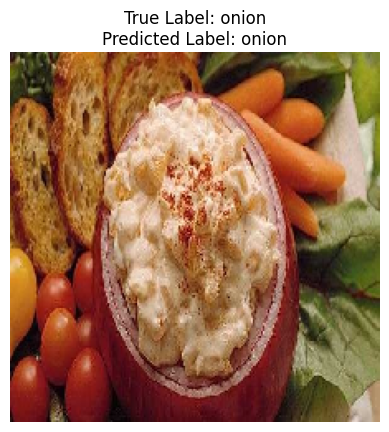

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 4

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model_11.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 35ms/step


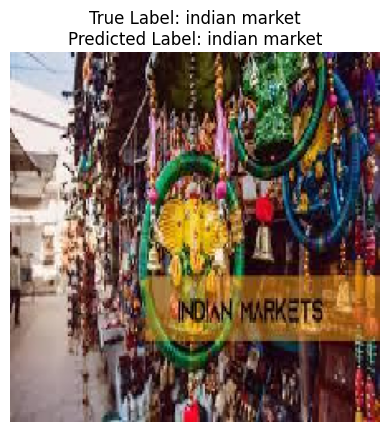

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 1

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model_11.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

**Model-2 (Non-BaseLine Model)**

*   Test accuracy of 90% which good than our previous base line model (75%)

*   Good F1 score

***MODEL-3***

**Transfer learning with Resnet 50 with last 10 layers as trainable weights**

In [ ]:
 from sklearn.utils.class_weight import compute_class_weight
class_labels = np.unique(train_generator.classes)
class_labels

array([0, 1, 2, 3], dtype=int32)

In [ ]:
train_classes=train_generator.classes

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(class_labels),
                                        y = train_classes      )

In [ ]:

class_weights = dict(zip(np.unique(train_classes), class_weights))
class_weights

{0: 1.3078125,
 1: 0.9231617647058824,
 2: 0.8730876216968011,
 3: 0.9932753164556962}

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model
model2 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
early_stopper = EarlyStopping(min_delta=0.001, patience=10, verbose=1)

In [ ]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [ ]:
history122 = model2.fit(train_generator, epochs=50, validation_data=valid_generator,
                    callbacks=[checkpoint, lr_reducer, early_stopper],class_weight=class_weights)

Epoch 1/50
79/79 [==============================] - 71s 670ms/step - loss: 1.1895 - accuracy: 0.4540 - val_loss: 1.8736 - val_accuracy: 0.2821 - lr: 0.0010
Epoch 2/50
79/79 [==============================] - 45s 573ms/step - loss: 0.9811 - accuracy: 0.5504 - val_loss: 1.2592 - val_accuracy: 0.3862 - lr: 0.0010
Epoch 3/50
79/79 [==============================] - 45s 573ms/step - loss: 0.8984 - accuracy: 0.5878 - val_loss: 1.6414 - val_accuracy: 0.3798 - lr: 0.0010
Epoch 4/50
79/79 [==============================] - 47s 593ms/step - loss: 0.8738 - accuracy: 0.6073 - val_loss: 1.9253 - val_accuracy: 0.3702 - lr: 0.0010
Epoch 5/50
79/79 [==============================] - ETA: 0s - loss: 0.8596 - accuracy: 0.6033
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
79/79 [==============================] - 45s 563ms/step - loss: 0.8596 - accuracy: 0.6033 - val_loss: 2.0473 - val_accuracy: 0.3910 - lr: 0.0010
Epoch 6/50
79/79 [==============================] - 44s 560ms

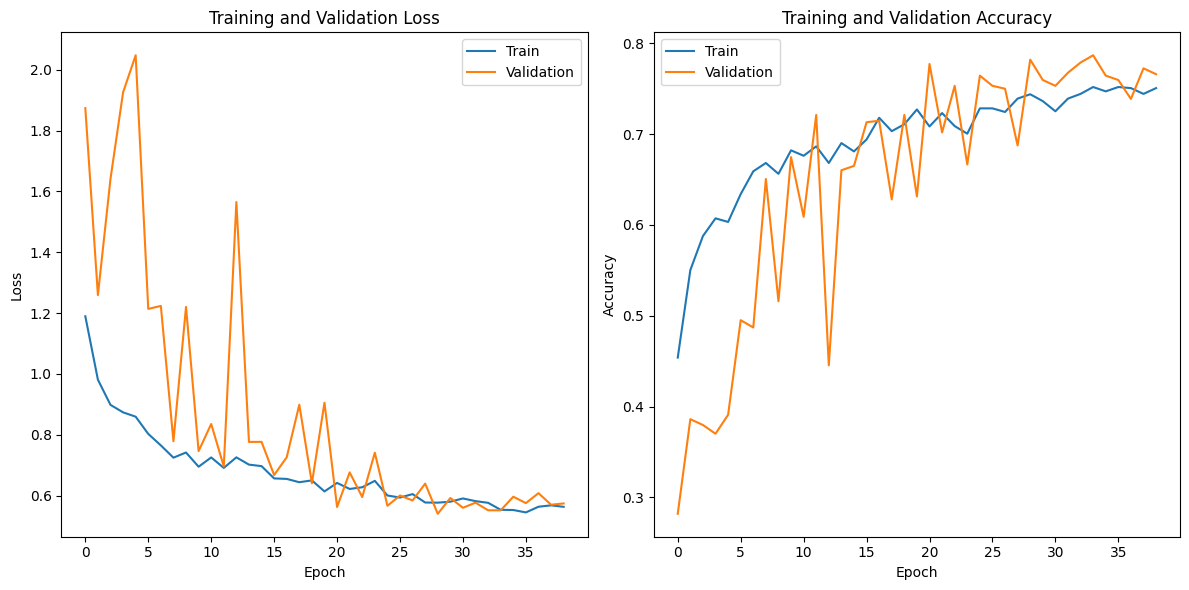

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history122.history['loss'], label='Train')
plt.plot(history122.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history122.history['accuracy'], label='Train')
plt.plot(history122.history['val_accuracy'], label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


11/11 [==============================] - 4s 313ms/step


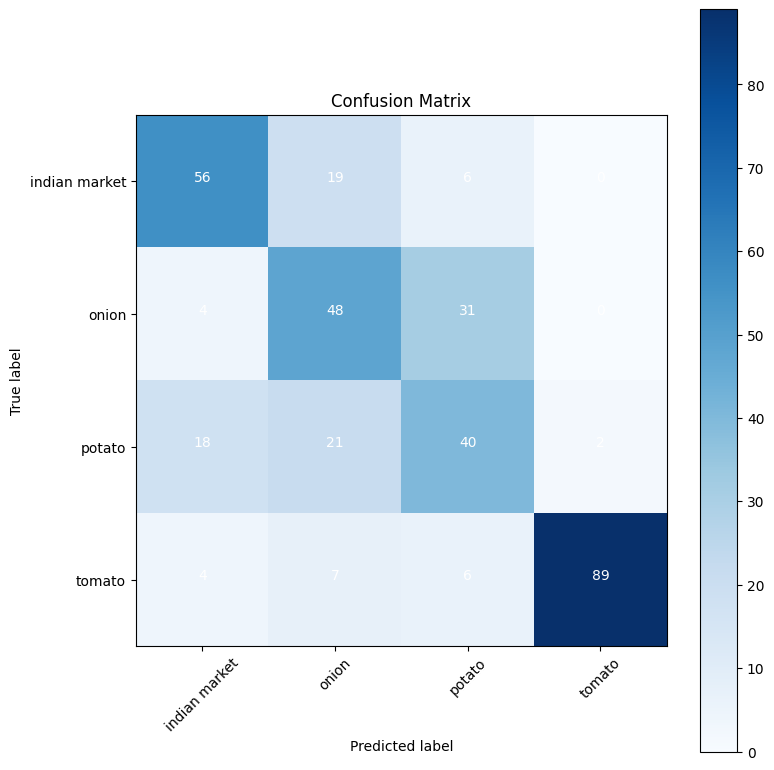

               precision    recall  f1-score   support

indian market       0.68      0.69      0.69        81
        onion       0.51      0.58      0.54        83
       potato       0.48      0.49      0.49        81
       tomato       0.98      0.84      0.90       106

     accuracy                           0.66       351
    macro avg       0.66      0.65      0.65       351
 weighted avg       0.68      0.66      0.67       351



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = model2.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

confusion_mat = confusion_matrix(test_true_labels, test_pred_labels)

class_names = list(test_generator.class_indices.keys())


plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display counts in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


report = classification_report(test_true_labels, test_pred_labels, target_names=class_names)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.6638176638176638


1/1 [==============================] - 2s 2s/step


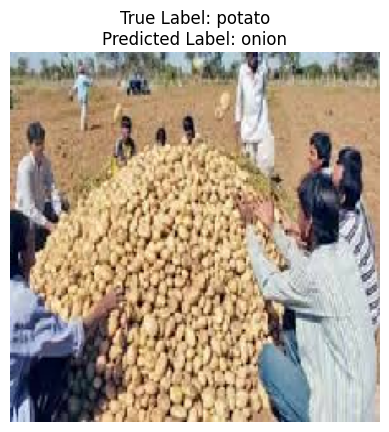

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 7

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model2.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 25ms/step


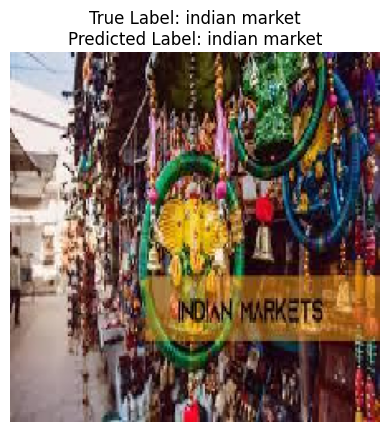

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 1

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model2.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 23ms/step


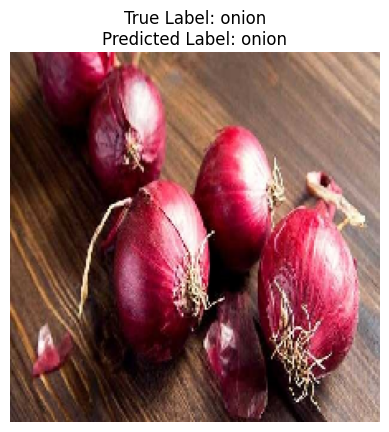

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 5

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model2.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

**Model-3 (Non-BaseLine Model)**

*   Test accuracy of 66% which BAD than our previous base line model (75%)


**MODEL-4**

**Transfer learning using InceptionV3**





In [ ]:

from tensorflow.keras.applications import InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
num_classes = 4

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint('best_model1.h5', save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
early_stopper = EarlyStopping(min_delta=0.001, patience=10, verbose=1)


In [ ]:
historya = model.fit(train_generator, epochs=50, validation_data=valid_generator,
                    callbacks=[checkpoint, lr_reducer, early_stopper],class_weight=class_weights)

Epoch 1/50
79/79 [==============================] - 55s 584ms/step - loss: 0.3592 - accuracy: 0.8530 - val_loss: 0.2340 - val_accuracy: 0.9183 - lr: 0.0010
Epoch 2/50
79/79 [==============================] - 44s 561ms/step - loss: 0.1721 - accuracy: 0.9315 - val_loss: 0.2261 - val_accuracy: 0.9263 - lr: 0.0010
Epoch 3/50
79/79 [==============================] - 45s 570ms/step - loss: 0.1370 - accuracy: 0.9442 - val_loss: 0.1866 - val_accuracy: 0.9391 - lr: 0.0010
Epoch 4/50
79/79 [==============================] - 44s 561ms/step - loss: 0.1244 - accuracy: 0.9494 - val_loss: 0.2191 - val_accuracy: 0.9183 - lr: 0.0010
Epoch 5/50
79/79 [==============================] - 44s 563ms/step - loss: 0.1069 - accuracy: 0.9626 - val_loss: 0.1678 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/50
79/79 [==============================] - 46s 585ms/step - loss: 0.1035 - accuracy: 0.9602 - val_loss: 0.1555 - val_accuracy: 0.9455 - lr: 0.0010
Epoch 7/50
79/79 [==============================] - 43s 540ms/st

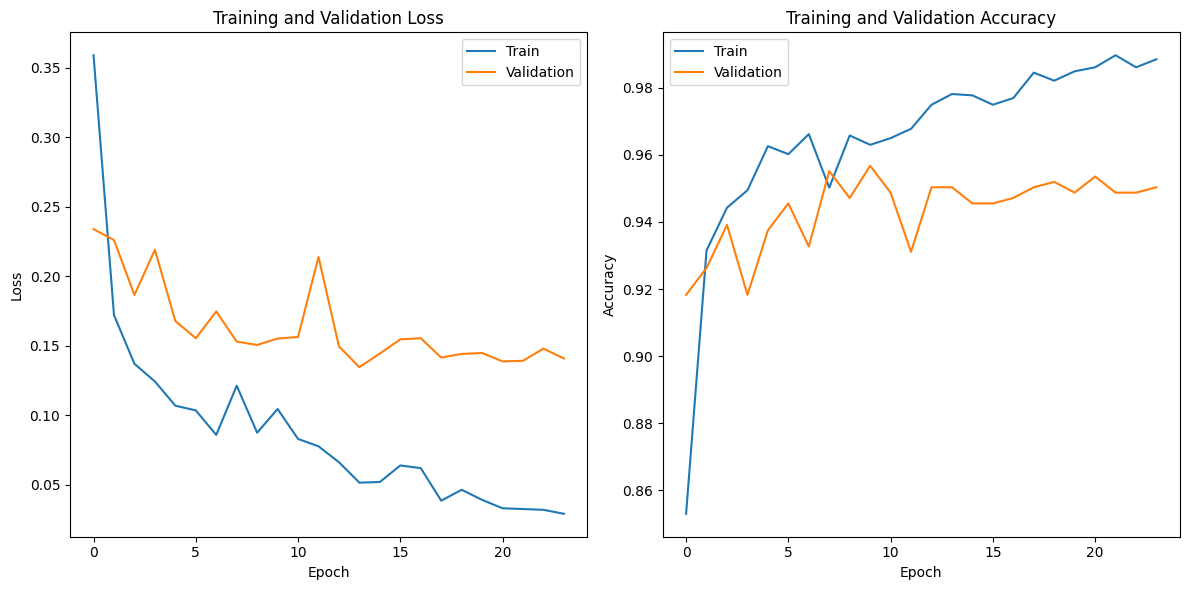

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historya.history['loss'], label='Train')
plt.plot(historya.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historya.history['accuracy'], label='Train')
plt.plot(historya.history['val_accuracy'], label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


11/11 [==============================] - 8s 514ms/step


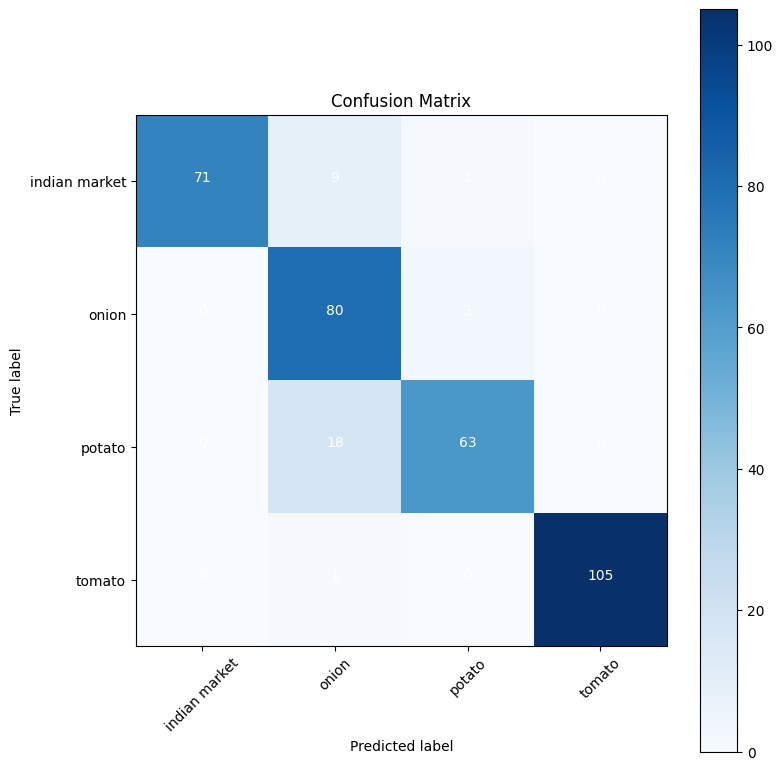

               precision    recall  f1-score   support

indian market       1.00      0.88      0.93        81
        onion       0.74      0.96      0.84        83
       potato       0.94      0.78      0.85        81
       tomato       1.00      0.99      1.00       106

     accuracy                           0.91       351
    macro avg       0.92      0.90      0.90       351
 weighted avg       0.92      0.91      0.91       351



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

confusion_mat = confusion_matrix(test_true_labels, test_pred_labels)

class_names = list(test_generator.class_indices.keys())


plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display counts in each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment="center", color="white")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


report = classification_report(test_true_labels, test_pred_labels, target_names=class_names)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.9088319088319088


1/1 [==============================] - 3s 3s/step


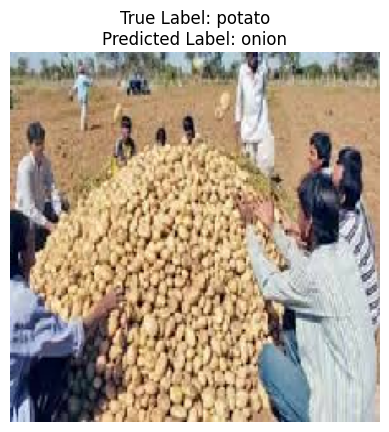

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 7

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 28ms/step


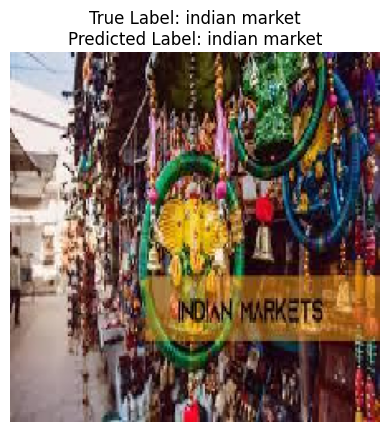

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 1

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[0])
predicted_probabilities = model.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[0])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 44ms/step


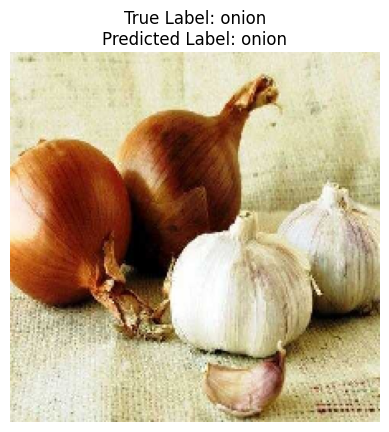

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 4

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[3])
predicted_probabilities = model.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[3])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 65ms/step


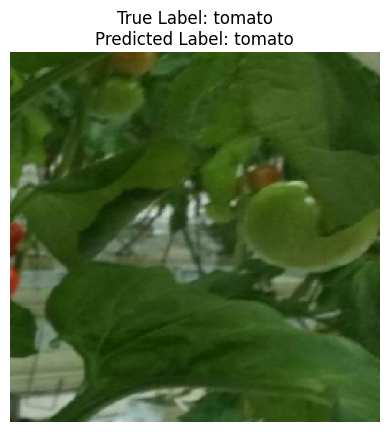

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


chosen_index = 8

# Get the image and label at the chosen index
image, label = test_generator[chosen_index]
image_array = img_to_array(image[1])
predicted_probabilities = model.predict(image_array.reshape(1,224,224,3))
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class = class_names[predicted_class_index]
true_label_index = np.argmax(label[1])
true_label = class_names[true_label_index]
plt.imshow(image_array)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_class}")
plt.axis('off')
plt.show()

**Model-4 (Non-BaseLine Model)**

*   Test accuracy of 90% which good than our previous base line model (75%)

*   Good F1 score

**Summary & Insights**



*   we keep model-1 as a base line model with test accuracy of 75%
*   Model-2 and transfer learning with insception net have best test accuracy of 90%

*   I consider model-4 as best it took 24 epoches , and less trainable parameters


*   Indiviual model performance is given above






